In [5]:
import numpy as np
import matplotlib.pylab as plt
import math as math
from scipy.optimize import fmin
from iminuit import Minuit, describe, Struct

%matplotlib  notebook

In [6]:
# Add code to the following function so that it takes in two datasets, loops over one of them, and finds
# information about the nearest neighbors in the other dataset, based on a flag. 

def nn(data0,data1,r=None,nneighbors=None):
    
    ret = -1
    ret_list=[]
    if r is not None and nneighbors is not None:
        exit(-1)
        return ret
    elif r is not None and nneighbors is None:
        for num0 in data0:
            count=0
            diff = np.abs(num0 - data1)
            count = len(diff[diff<r])
            ret_list.append(float(count)/(float(len(data1))*r))
        ret_list = np.array(ret_list)
        return ret_list
    elif r is None and nneighbors is not None:
        for num0 in data0:
            diff = np.abs(num0 - data1)
            diff.sort()
            radius= diff[nneighbors-1]
            ret_list.append(1/radius)
        ret_list = np.array(ret_list)
        return ret_list
    return ret

In [7]:
def normal(x,mean,width):
    return (1.0/(width*np.sqrt(2*np.pi)))*(np.exp(-(x-mean)**2/(2*(width**2))))

def calc_pull(iterations, dataPoints, MC, rad):
    pull_frac_list=[]
    average_best_frac = 0
    frac = []
    fit_frac = []
    fit_frac_uncert = []
    
    

    for num in range(iterations):
        #Nsig = dataPoints
        Nsig = np.random.poisson(dataPoints)
        sig_mean=10.4
        sig_width=.06
        signal = np.random.normal(sig_mean,sig_width,Nsig)
        Nbkg = 1000
        #Nbkg = np.random.poisson(Nbkg)
        background = 9.0+(2*np.random.random(Nbkg))
        data = signal.copy()
        data = np.append(data,background.copy())

        frac.append(float(Nsig)/(float(Nbkg)+float(Nsig)))
        Nsig_compare = MC
        sig_mean_compare = sig_mean
        sig_width_compare = sig_width
        signal_compare = np.random.normal(sig_mean_compare,sig_width_compare,Nsig_compare)
        
        Nbkg_compare= MC
        background_compare= 9.0+(2*np.random.random(Nbkg_compare))
        
        def probability(frac):
            tot_prob=[]
            #signal_prob=nn(data,signal_compare, nneighbors=100)
            #background_prob= nn(data, background_compare, nneighbors=100)
            #signal_prob=nn(data,signal_compare, r=rad)
            #background_prob= nn(data, background_compare, r=rad)
            signal_prob = normal(data,10.4,0.06)
            background_prob = 0.5*np.ones(len(data))
            tot_prob.append(frac*signal_prob+ ((1-frac)*background_prob))
            tot_prob=np.array(tot_prob)
            tot_prob[tot_prob<=0.0] = 1e-64
            #print -np.log(tot_prob[tot_prob>0]).sum() - -np.log(tot_prob).sum()
            #return -np.log(tot_prob[tot_prob>0]).sum()
            return -np.log(tot_prob).sum()
        
        m=Minuit(probability, frac= 0.25, limit_frac=(0.001,1), error_frac=0.001,  errordef = 0.5, print_level=0)
        m.migrad()
        #m.hesse()
        if (m.get_fmin().is_valid):
            param=m.values
            err=m.errors
            fit_frac.append(param["frac"])
            fit_frac_uncert.append(err["frac"])
            #print Nsig,Nbkg,(float(Nsig)/(float(Nbkg)+float(Nsig))),param["frac"],err["frac"]
            pull_frac=((float(Nsig)/(float(Nbkg)+float(Nsig)))-param["frac"])/err["frac"]
            ndata = len(data)
            frac_org = Nsig/float(Nsig + Nbkg)
            nsig_org = frac_org * ndata
            nsig_fit = param["frac"]
            nsig_err = err["frac"]
            pull_frac_list.append(pull_frac)
    return pull_frac_list, frac, fit_frac, fit_frac_uncert,iterations

In [8]:
means=[]
stds=[]

for sig in [500]:
    for MC in [5000]:
        for rad in [0.01]: #, 0.10,0.20,0.50]:
            
            print 'number of signal points: %s \t number of MC point: %s \tradius: %s' % (sig,MC,rad)
            pulls,org_vals,fit_vals,fit_uncerts,iteration = calc_pull(200, sig, MC, rad)
            #plt.figure()
            #plt.hist(pulls, bins=50)
            #x = np.linspace(-5,5,1000)
            #y=normal(x,0,1)
            #plt.plot(x,(iteration*7/(50))*y,'y-',linewidth=2)
            parameters_mean = {'signal': sig, 'MC_points': MC, 'radius': rad, 'mean pulls': np.mean(pulls)}
            means.append(parameters_mean)
            parameters_std = {'signal': sig, 'MC_points': MC, 'radius': rad, 'mean stds': np.std(pulls)}
            stds.append(parameters_std)
            #print "-----------------"
            #print pulls
            

#plt.figure(figsize=(6,6))
point_color='bo'
sizes=0


#print "---------------"
print means
print stds

#WITH THE POISSON and 100 iterations- TESTING IT

number of signal points: 500 	 number of MC point: 5000 	radius: 0.01
[{'signal': 500, 'radius': 0.01, 'mean pulls': -0.036790151553328335, 'MC_points': 5000}]
[{'signal': 500, 'radius': 0.01, 'mean stds': 0.59359813037520004, 'MC_points': 5000}]


In [9]:
print means
print stds


[{'signal': 500, 'radius': 0.01, 'mean pulls': -0.036790151553328335, 'MC_points': 5000}]
[{'signal': 500, 'radius': 0.01, 'mean stds': 0.59359813037520004, 'MC_points': 5000}]


In [10]:
def normal(x,mean,width):
    return (1.0/(width*np.sqrt(2*np.pi)))*(np.exp(-(x-mean)**2/(2*(width**2))))



In [11]:
def calc_pull_extended(iterations, dataPoints, MC, rad):
    pull_frac_list=[]
    average_best_frac = 0
    frac = []
    fit_frac = []
    fit_frac_uncert = []
    
    

    for num in range(iterations):
        Nsig = dataPoints
        Nsig_org = dataPoints
        Nsig = np.random.poisson(dataPoints)
        sig_mean=10.0
        sig_width=.10
        signal = np.random.normal(sig_mean,sig_width,Nsig)
        
        Nbkg = 1000
        Nbkg = np.random.poisson(Nbkg)
        background = 9.0+(2*np.random.random(Nbkg))
        
        data = signal.copy()
        data = np.append(data,background.copy())
        
        #plt.figure(figsize=(6,6))
        #plt.hist(data,bins=50)

        frac.append(Nsig)
        
        
        def probability(ns,nb,mean):
            tot_prob=[]

            ntot = float(ns + nb)
            ndata = float(len(data))

            signal_prob = normal(data,mean,sig_width)
            background_prob = 0.5*np.ones(len(data))
            
            tot_prob.append((ns/ntot)*signal_prob + ((nb/ntot)*background_prob))
            tot_prob=np.array(tot_prob)
            tot_prob[tot_prob<=0.0] = 1e-64
            
            #print -np.log(tot_prob[tot_prob>0]).sum() - -np.log(tot_prob).sum()
            #return -np.log(tot_prob[tot_prob>0]).sum()
            return -np.log(tot_prob).sum() - (ndata*np.log(ntot) - ntot)
        
        ########### CALL MINUIT #################################
        m=Minuit(probability, ns= 500, limit_ns=(1,2000), error_ns=0.001,\
                 nb= 1000, limit_nb=(1,2000), error_nb=0.001,\
                 mean= 10, limit_mean=(9,11), error_mean=0.001,\
                 errordef = 0.5, print_level=0)
        
        m.migrad()
        #m.minos()
        #m.hesse()
        if (m.get_fmin().is_valid):
            param=m.values
            err=m.errors
            #print err
            #err = m.get_merrors()
            #print err
            fit_frac.append(param["ns"])
            fit_frac_uncert.append(err["ns"])

            pull_frac=(float(Nsig_org)-param["ns"])/(err["ns"]/1.0)
            #pull_frac=(10.0-param["mean"])/(err["mean"]/1.0)
            #print "Vals:",Nsig,Nbkg,len(data),param["ns"],param["nb"],param["ns"]+param["nb"],err["ns"]

            ndata = len(data)
            pull_frac_list.append(pull_frac)
    return pull_frac_list, frac, fit_frac, fit_frac_uncert,iterations

number of signal points: 50 	 number of MC point: 1000 	radius: 0.01
number of signal points: 50 	 number of MC point: 1000 	radius: 0.05
number of signal points: 50 	 number of MC point: 1000 	radius: 0.1
number of signal points: 50 	 number of MC point: 5000 	radius: 0.01
number of signal points: 50 	 number of MC point: 5000 	radius: 0.05
number of signal points: 50 	 number of MC point: 5000 	radius: 0.1
number of signal points: 50 	 number of MC point: 10000 	radius: 0.01
number of signal points: 50 	 number of MC point: 10000 	radius: 0.05
number of signal points: 50 	 number of MC point: 10000 	radius: 0.1
number of signal points: 300 	 number of MC point: 1000 	radius: 0.01
number of signal points: 300 	 number of MC point: 1000 	radius: 0.05
number of signal points: 300 	 number of MC point: 1000 	radius: 0.1
number of signal points: 300 	 number of MC point: 5000 	radius: 0.01
number of signal points: 300 	 number of MC point: 5000 	radius: 0.05
number of signal points: 300 	

<IPython.core.display.Javascript object>


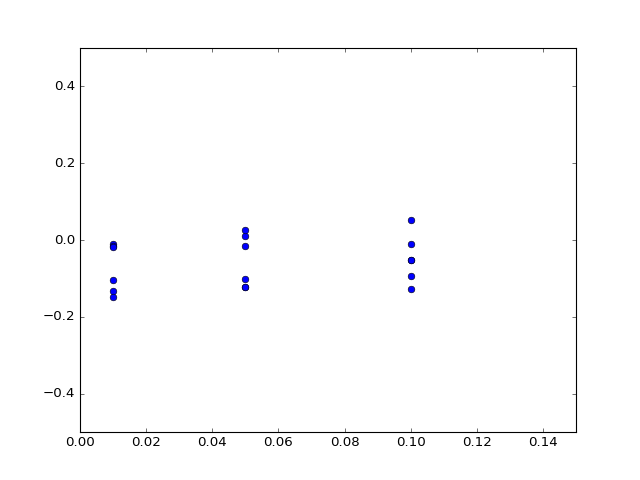

<IPython.core.display.Javascript object>


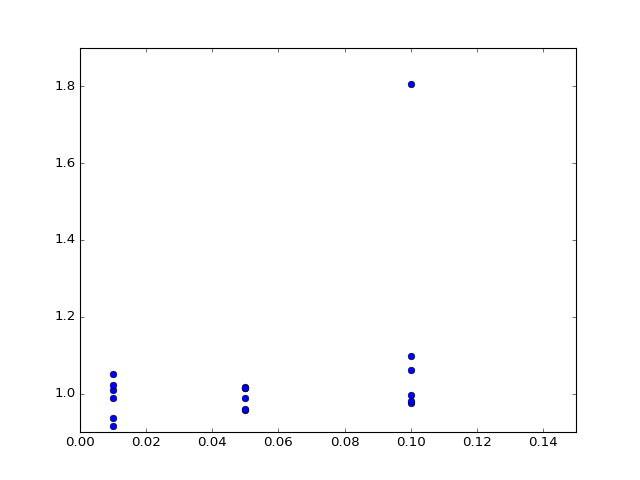

[{'signal': 50, 'radius': 0.01, 'mean pulls': -0.13348219233310965, 'MC_points': 1000}, {'signal': 50, 'radius': 0.05, 'mean pulls': -0.10128356356284661, 'MC_points': 1000}, {'signal': 50, 'radius': 0.1, 'mean pulls': -0.12657050438401007, 'MC_points': 1000}, {'signal': 50, 'radius': 0.01, 'mean pulls': -0.10332093928993176, 'MC_points': 5000}, {'signal': 50, 'radius': 0.05, 'mean pulls': -0.12191446306910256, 'MC_points': 5000}, {'signal': 50, 'radius': 0.1, 'mean pulls': -0.051361112554930664, 'MC_points': 5000}, {'signal': 50, 'radius': 0.01, 'mean pulls': -0.14721283277264013, 'MC_points': 10000}, {'signal': 50, 'radius': 0.05, 'mean pulls': -0.12354272395185902, 'MC_points': 10000}, {'signal': 50, 'radius': 0.1, 'mean pulls': -0.051011057877210157, 'MC_points': 10000}, {'signal': 300, 'radius': 0.01, 'mean pulls': -0.011404738163132914, 'MC_points': 1000}, {'signal': 300, 'radius': 0.05, 'mean pulls': 0.011469898636062738, 'MC_points': 1000}, {'signal': 300, 'radius': 0.1, 'mean 

In [25]:
means=[]
stds=[]

for sig in [50,300]:
    for MC in [1000, 5000, 10000]: #,5000,10000]:
        for rad in [0.01,0.05,0.1]: #, 0.10,0.20,0.50]:
            
            print 'number of signal points: %s \t number of MC point: %s \tradius: %s' % (sig,MC,rad)
            pulls,org_vals,fit_vals,fit_uncerts,iteration = calc_pull_extended(1000, sig, MC, rad)
            #plt.figure()
            #plt.hist(pulls, bins=50)
            #x = np.linspace(-5,5,1000)
            #y=normal(x,0,1)
            #plt.plot(x,(iteration*7/(50))*y,'y-',linewidth=2)
            parameters_mean = {'signal': sig, 'MC_points': MC, 'radius': rad, 'mean pulls': np.mean(pulls)}
            means.append(parameters_mean)
            parameters_std = {'signal': sig, 'MC_points': MC, 'radius': rad, 'mean stds': np.std(pulls)}
            stds.append(parameters_std)
            #print "-----------------"
            #print pulls
            

#plt.figure(figsize=(6,6))
point_color='bo'
sizes=0

for item in means:
    plt.plot(item['radius'],item['mean pulls'], 'bo')
plt.xlim(0,.15)
plt.ylim(-.5,.5)

plt.figure()
for item in stds:
    plt.plot(item['radius'],item['mean stds'], 'bo')
plt.xlim(0,.15)
#plt.ylim(-.5,.5)

#print "---------------"
print means
print stds

#WITH THE POISSON and 100 iterations- TESTING IT

In [ ]:
plt.figure()
plt.hist(pulls,bins=50)
x = np.arange(-5,5,0.1)
y = 70*normal(x,0.0,1.0)
plt.plot(x,y)